In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)
print(mouse_metadata_df.head())
print(study_results_df.head())

# Combine the data into a single dataset
combined=pd.merge(mouse_metadata_df, study_results_df, on=["Mouse ID"])
combined.head(30)
combined.info()

# Display the data table for preview


  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2

In [2]:
# Check the number of mice.
unique_mice=combined['Mouse ID'].unique()
unique_mice_count=len(unique_mice)
unique_mice_count

249

In [3]:
group_by_mouse=combined.groupby(['Mouse ID'])
group_by_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,0,45.000000,0
1884,z969,Naftisol,Male,9,30,5,49.332999,0
1885,z969,Naftisol,Male,9,30,10,52.656081,1
1886,z969,Naftisol,Male,9,30,15,54.713005,2


In [4]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
combined.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [5]:
# Drop any duplicate rows
clean_mouse_df=combined.drop_duplicates(inplace=False)
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Recheck the number of mice
unique_mice=clean_mouse_df['Mouse ID'].unique()
unique_mice_count=len(unique_mice)
unique_mice_count


249

## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.

avg_tumor_vol=clean_mouse_df.groupby(['Drug Regimen']).mean()["Tumor Volume (mm3)"]
median_tumor_vol=clean_mouse_df.groupby(['Drug Regimen']).median()["Tumor Volume (mm3)"]
std_tumor_vol=clean_mouse_df.groupby(['Drug Regimen']).std()["Tumor Volume (mm3)"]
sem_tutor_vol=clean_mouse_df.groupby(['Drug Regimen']).sem()["Tumor Volume (mm3)"]
var_tutor_vol=clean_mouse_df.groupby(['Drug Regimen']).var()["Tumor Volume (mm3)"]

#count how many times each drug regimen was tested
test_count=clean_mouse_df.groupby(['Drug Regimen']).count()['Mouse ID']

summary_table=pd.DataFrame({"Test Count": test_count,
                            "Average Tumor Volume": avg_tumor_vol,
                            "Median Tumor Vol": median_tumor_vol,
                            "Standard Dev": std_tumor_vol,
                            "Standard Error of Mean": sem_tutor_vol,
                            "Variance of Tumor Volume": var_tutor_vol
                            })
summary_table.info()
summary_table

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Capomulin to Zoniferol
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Test Count                10 non-null     int64  
 1   Average Tumor Volume      10 non-null     float64
 2   Median Tumor Vol          10 non-null     float64
 3   Standard Dev              10 non-null     float64
 4   Standard Error of Mean    10 non-null     float64
 5   Variance of Tumor Volume  10 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 560.0+ bytes


,Test Count,Average Tumor Volume,Median Tumor Vol,Standard Dev,Standard Error of Mean,Variance of Tumor Volume
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,0.329346,24.947764
Ceftamin,178,52.591172,51.776157,6.268188,0.469821,39.290177
Infubinol,178,52.884795,51.820584,6.567243,0.492236,43.128684
Ketapril,188,55.235638,53.698743,8.279709,0.603860,68.553577
Naftisol,186,54.331565,52.509285,8.134708,0.596466,66.173479
Placebo,181,54.033581,52.288934,7.821003,0.581331,61.168083
Propriva,160,52.368318,50.909965,6.502160,0.514041,42.278090
Ramicane,228,40.216745,40.673236,4.846308,0.320955,23.486704
Stelasyn,181,54.233149,52.431737,7.710419,0.573111,59.450562


## Bar and Pie Charts

In [37]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.

x_axis=np.arange(len(test_count))
data = summary_table['Test Count']


# There should be a single bar per regimen




<IPython.core.display.Javascript object>


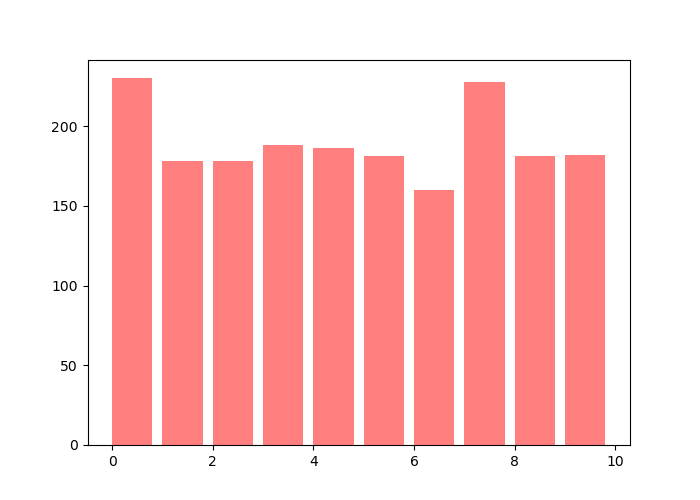

In [43]:
plt.figure(figsize=(7,5))
plt.bar(x_axis, data, color='r', alpha=0.5, align="edge")
# plt.xticks(clean_mouse_df["Drug Regimen"], rotation="vertical")


plt.show()



In [ ]:
# Generate identical bar plot using pyplot instead of pandas.



In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_mouse_df.groupby(['Mouse ID']).sum()['Sex']


KeyError: 'Sex'

In [ ]:
# Generate identical pie plot using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [ ]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Observations and Insights